<a href="https://colab.research.google.com/github/ethngo7/poker-cv-project/blob/main/poker_cv_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:

!pip install ultralytics
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [8]:
!nvidia-smi

Mon Jul 14 05:37:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [10]:
from google.colab import files
uploaded = files.upload()

Saving v3poker-community-cards.v7-v3.yolov8.zip to v3poker-community-cards.v7-v3.yolov8.zip


In [13]:
import yaml, os

with open("v3_dataset/data.yaml") as f:
    y = yaml.safe_load(f)

print("Train images:", len(os.listdir("v3_dataset/train/images")))
print("Val images:",   len(os.listdir("v3_dataset/valid/images")))
print("Test images:",  len(os.listdir("v3_dataset/test/images")))


Train images: 247
Val images: 15
Test images: 9


In [11]:
# @title v3 Community Cards

import zipfile
import os

zip_filename = next(iter(files.upload().keys()))  # run if you haven't set it
print("ZIP file uploaded:", zip_filename)

# 3. Unzip to a new folder (e.g., v2_dataset)
unzip_dir = "v3_dataset"
with zipfile.ZipFile(zip_filename, "r") as zip_ref:
    zip_ref.extractall(unzip_dir)

# 4. Inspect the extracted dataset
print("Top-level contents:", os.listdir(unzip_dir))
print("data.yaml exists?", os.path.exists(f"{unzip_dir}/data.yaml"))
print("train images sample:", os.listdir(f"{unzip_dir}/train/images")[:5])

Saving v3poker-community-cards.v7-v3.yolov8.zip to v3poker-community-cards.v7-v3.yolov8 (1).zip
ZIP file uploaded: v3poker-community-cards.v7-v3.yolov8 (1).zip
Top-level contents: ['train', 'README.dataset.txt', 'test', 'README.roboflow.txt', 'valid', 'data.yaml']
data.yaml exists? True
train images sample: ['Screenshot-2025-07-07-at-17_22_30_png.rf.83deb1d4647d6ca70e03bb98f84a3e74.jpg', 'Screenshot-2025-07-07-at-17_22_09_png.rf.0fd7c22e02993bc702ae373dbf067791.jpg', 'take-poker-hands-quiz_png.rf.a80787f1db8f0d7585b442219e9aa177.jpg', 'IMG_2750_jpg.rf.5ae300724a04a9d5cc06fe4f164f164c.jpg', 'board_webp.rf.ef8d9f08b705d0a0961f74b67f40cdb3.jpg']


In [16]:
# @title Training on v2 Dataset

from ultralytics import YOLO

model = YOLO("yolov8n.pt")        # or yolov8s.pt for more capacity
model.train(
    data=f"{unzip_dir}/data.yaml",  # points to dataset you just unzipped
    epochs=50,
    imgsz=640
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 81.8MB/s]


Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=v3_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

100%|██████████| 755k/755k [00:00<00:00, 23.1MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 87.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9.1±4.6 MB/s, size: 33.7 KB)


train: Scanning /content/v3_dataset/train/labels... 247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 718.71it/s]

train: New cache created: /content/v3_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 43.4±65.0 MB/s, size: 39.8 KB)


val: Scanning /content/v3_dataset/valid/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 264.97it/s]

val: New cache created: /content/v3_dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.06G      1.165       2.14      1.225         66        640: 100%|██████████| 16/16 [00:07<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         15         67      0.963      0.418      0.706      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.08G     0.9128     0.8304      1.063         59        640: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         15         67      0.987      0.507      0.707      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.1G     0.8821     0.7384      1.038         54        640: 100%|██████████| 16/16 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         15         67      0.941      0.718      0.907      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.12G     0.8803     0.6977      1.021         66        640: 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


                   all         15         67       0.84      0.785      0.889      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.14G     0.8866     0.6567      1.041         72        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         15         67      0.872      0.918      0.919      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.16G     0.8953     0.6678      1.048         51        640: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         15         67          1       0.88      0.942      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.17G      0.829      0.632          1         84        640: 100%|██████████| 16/16 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         15         67      0.993       0.94      0.976      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.19G       0.88     0.6149       1.02         69        640: 100%|██████████| 16/16 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         15         67          1      0.939      0.987      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.21G     0.8524     0.5936      1.026         67        640: 100%|██████████| 16/16 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         15         67      0.999       0.94      0.968      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.22G     0.7934     0.5763      1.009         43        640: 100%|██████████| 16/16 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         15         67      0.982       0.94      0.963      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.24G     0.7679     0.5534     0.9905         65        640: 100%|██████████| 16/16 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         15         67      0.999      0.955      0.987      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.26G     0.7489     0.5285     0.9764         65        640: 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         15         67      0.999       0.94      0.951      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.28G      0.791     0.5383      1.003         59        640: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         15         67      0.998       0.94      0.948      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.29G      0.804     0.5299      1.005         62        640: 100%|██████████| 16/16 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         15         67      0.984      0.955       0.98      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.31G     0.7583     0.4926     0.9824         65        640: 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         15         67      0.999      0.955      0.982      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.33G     0.7379     0.5012     0.9935         60        640: 100%|██████████| 16/16 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         15         67      0.998       0.94      0.945      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.34G     0.7298     0.4735     0.9794         73        640: 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         15         67      0.998       0.94      0.974      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.36G     0.7523     0.4734     0.9935         57        640: 100%|██████████| 16/16 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         15         67      0.987      0.955      0.975      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.38G     0.7382     0.4701     0.9744         56        640: 100%|██████████| 16/16 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         15         67          1      0.937      0.974      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.39G     0.7315      0.466     0.9782         58        640: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         15         67      0.977       0.94      0.979      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.41G     0.7013     0.4505     0.9671         71        640: 100%|██████████| 16/16 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         15         67      0.997       0.94      0.978      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.43G     0.6505     0.4167     0.9422         69        640: 100%|██████████| 16/16 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         15         67          1       0.94       0.97      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.45G     0.6772      0.421     0.9612         61        640: 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         15         67      0.995       0.94      0.963      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.46G      0.677     0.4188     0.9562         68        640: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         15         67      0.983       0.94      0.965      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.48G     0.6798     0.4271     0.9533         67        640: 100%|██████████| 16/16 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         15         67      0.995       0.94      0.953      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.5G     0.6627     0.4143     0.9478         63        640: 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         15         67      0.968       0.94      0.952      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.51G     0.6777     0.4201     0.9519         77        640: 100%|██████████| 16/16 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         15         67      0.982      0.925      0.951      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.53G     0.6559     0.4039     0.9395         91        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         15         67      0.967       0.94      0.955      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.55G     0.6377     0.3804     0.9346         66        640: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         15         67       0.98      0.925      0.962      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.57G     0.6233     0.3815     0.9345         78        640: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         15         67      0.984      0.925      0.969      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.58G     0.6281     0.3871     0.9386         62        640: 100%|██████████| 16/16 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         15         67          1      0.924      0.955      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.6G     0.6244     0.3772     0.9325         76        640: 100%|██████████| 16/16 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         15         67      0.994      0.925      0.949      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.62G     0.6255      0.379     0.9261         61        640: 100%|██████████| 16/16 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         15         67      0.994      0.925      0.954      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.63G     0.6116     0.3662     0.9286         64        640: 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         15         67      0.954      0.955      0.954      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.65G     0.6075     0.3636     0.9245         67        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         15         67      0.986      0.925      0.955       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.67G     0.5961     0.3609     0.9228         54        640: 100%|██████████| 16/16 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         15         67      0.984       0.94      0.954      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.69G     0.5888     0.3639     0.9369         49        640: 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         15         67      0.983      0.955      0.955       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.7G     0.5888     0.3644     0.9343         49        640: 100%|██████████| 16/16 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         15         67      0.983       0.94      0.958      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.72G     0.5665     0.3373     0.9136         48        640: 100%|██████████| 16/16 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         15         67      0.984      0.955      0.955      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.74G     0.5583     0.3514     0.9055         80        640: 100%|██████████| 16/16 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         15         67       0.97      0.953      0.955      0.761


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.79G     0.5251     0.3414     0.8857         28        640: 100%|██████████| 16/16 [00:05<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         15         67      0.998      0.925      0.954      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       2.8G     0.5225     0.3235     0.8747         29        640: 100%|██████████| 16/16 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         15         67      0.997      0.925      0.955      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.82G     0.5279      0.313     0.8777         28        640: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         15         67      0.997      0.925      0.955      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.84G     0.5136     0.3049     0.8672         32        640: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         15         67      0.994      0.925      0.956      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.86G     0.4931     0.2987     0.8679         30        640: 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         15         67      0.969      0.955      0.958      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.87G     0.4765     0.2898     0.8693         31        640: 100%|██████████| 16/16 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         15         67      0.984      0.936      0.955      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.89G     0.4894     0.2933     0.8688         28        640: 100%|██████████| 16/16 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         15         67      0.984       0.94      0.955      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.91G      0.458     0.2854     0.8559         28        640: 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         15         67      0.983       0.94      0.954      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.92G      0.455     0.2769     0.8433         28        640: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         15         67      0.984       0.94      0.954      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.94G     0.4487     0.2707     0.8599         27        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         15         67      0.998      0.925      0.954      0.756



50 epochs completed in 0.066 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]


                   all         15         67          1      0.939      0.987      0.778
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x789f67f00e10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# @title Downloading a zip for v2 Trained

'''!zip -r runs.zip runs
files.download("runs.zip")'''

'!zip -r runs.zip runs\nfiles.download("runs.zip")'

In [ ]:
# @title Train5

import zipfile
import os

with zipfile.ZipFile("train5.zip", 'r') as zip_ref:
  zip_ref.extractall("train5")

# Confirm contents
print(os.listdir("train5/train5/weights"))

FileNotFoundError: [Errno 2] No such file or directory: 'train5.zip'

In [62]:
# uploaded = files.upload()

img_name = "/content/v3_dataset/test/images/Screenshot-2025-07-07-at-17_15_36_png.rf.3ec65f564aefc9f83a07eefb83970ed3.jpg"

model = YOLO("runs/detect/train/weights/best.pt")   # <-- put your real path here
results = model(img_name, save=True, conf=0.5)
boxes = results[0].boxes
top5 = boxes.conf.argsort(descending=True)[:5]
final_boxes = boxes[top5]
print(final_boxes)




image 1/1 /content/v3_dataset/test/images/Screenshot-2025-07-07-at-17_15_36_png.rf.3ec65f564aefc9f83a07eefb83970ed3.jpg: 224x640 4 community_cards, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Results saved to runs/detect/predict19
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.9149, 0.9148, 0.9009, 0.8976], device='cuda:0')
data: tensor([[3.4945e+02, 7.1468e+01, 5.2327e+02, 3.4082e+02, 9.1487e-01, 0.0000e+00],
        [1.4940e+02, 7.0954e+01, 3.3283e+02, 3.3703e+02, 9.1480e-01, 0.0000e+00],
        [5.4849e+02, 6.8403e+01, 7.2198e+02, 3.3423e+02, 9.0085e-01, 0.0000e+00],
        [7.7484e+02, 7.0338e+01, 9.5023e+02, 3.4274e+02, 8.9757e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (432, 1334)
shape: torch.Size([4, 6])
xywh: tensor([[436.3615, 206.1420, 173.8208, 269.3481],
        [241.1166, 203.9944, 183.4273, 266.0810],
        

Kept 4 community-card boxes:
[[     349.45      71.468      523.27      340.82]
 [      149.4      70.954      332.83      337.03]
 [     548.49      68.403      721.98      334.23]
 [     774.84      70.338      950.23      342.74]]
Prediction folder: runs/detect/predict19
Displaying: runs/detect/predict19/Screenshot-2025-07-07-at-17_15_36_png.rf.3ec65f564aefc9f83a07eefb83970ed3.jpg


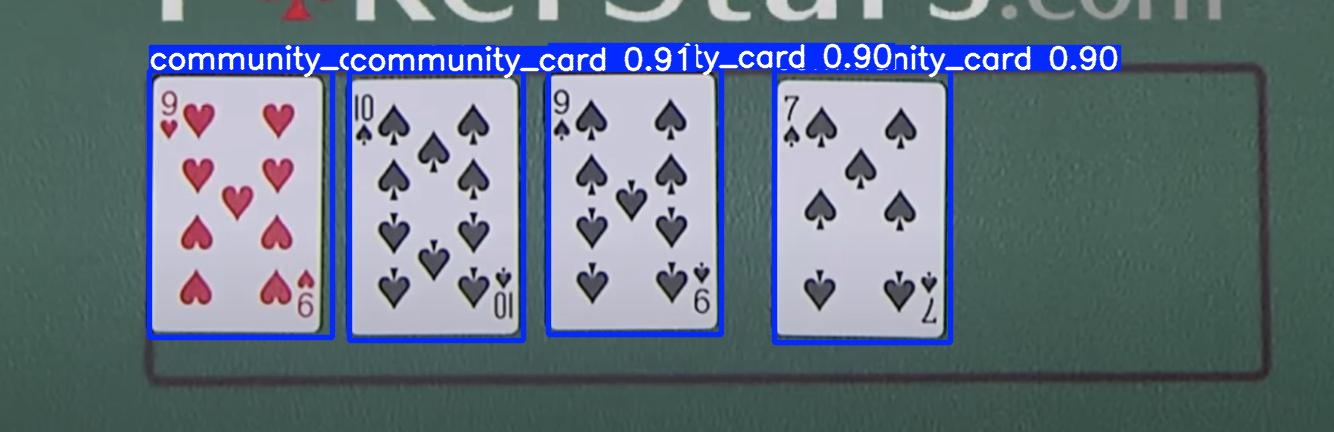

In [63]:
# @title Filter Top-5 and Location-Based Boxes

import torch
from pathlib import Path
from IPython.display import Image
import os
import numpy as np

# 3️⃣  Post-process


boxes   = results[0].boxes
conf    = boxes.conf.cpu().numpy()           # confidences
xyxy    = boxes.xyxy.cpu().numpy()           # [N,4] boxes

# Sort detections by confidence (high → low)
order   = conf.argsort()[::-1]
xyxy    = xyxy[order]
conf    = conf[order]

# Compute vertical centre of every box
y_centers = (xyxy[:,1] + xyxy[:,3]) / 2      # shape (N,)

# Cluster y-centres into rows
H       = results[0].orig_shape[0]
row_tol = 0.12 * H          # 12 % of image height ≈ row tolerance
rows = []                   # each element: [row_y, [indices]]

for i, y in enumerate(y_centers):
    for row in rows:
        if abs(y - row[0]) < row_tol:        # belongs to existing row
            row[1].append(i)
            break
    else:                                    # create new row
        rows.append([y, [i]])

# Pick the row with the most detections  ➜  community-card row
best_row     = max(rows, key=lambda r: len(r[1]))
best_indices = best_row[1][:5]               # keep ≤ 5 highest-conf boxes
final_boxes  = xyxy[best_indices]

print(f"Kept {len(final_boxes)} community-card boxes:")
print(final_boxes)
# ───────────────────────────────────────────────────────────────────────────



# results is a list → take the first (only) element
r = results[0]

# Folder YOLO wrote the prediction into
pred_dir = Path(r.save_dir)        # e.g. runs/detect/predict3
print("Prediction folder:", pred_dir)

# Pick the first image in that folder (jpg or png)
pred_img = next(pred_dir.glob("*.*"))   # grabs whatever file YOLO saved
print("Displaying:", pred_img)

# 4️⃣  Display the saved prediction image
pred_dir = max(Path("runs/detect").glob("predict*"), key=lambda p: p.stat().st_mtime)
display(Image(filename=str(pred_dir / Path(img_name).name)))

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1363.6±585.7 MB/s, size: 36.6 KB)


val: Scanning /content/v3_dataset/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]


                   all         15         67          1      0.939      0.988      0.781
Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/val7
--- Main metrics ---
(mAP50-95): 0.7813
mAP50   : 0.9878
Precision: 1.0000
Recall   : 0.9392


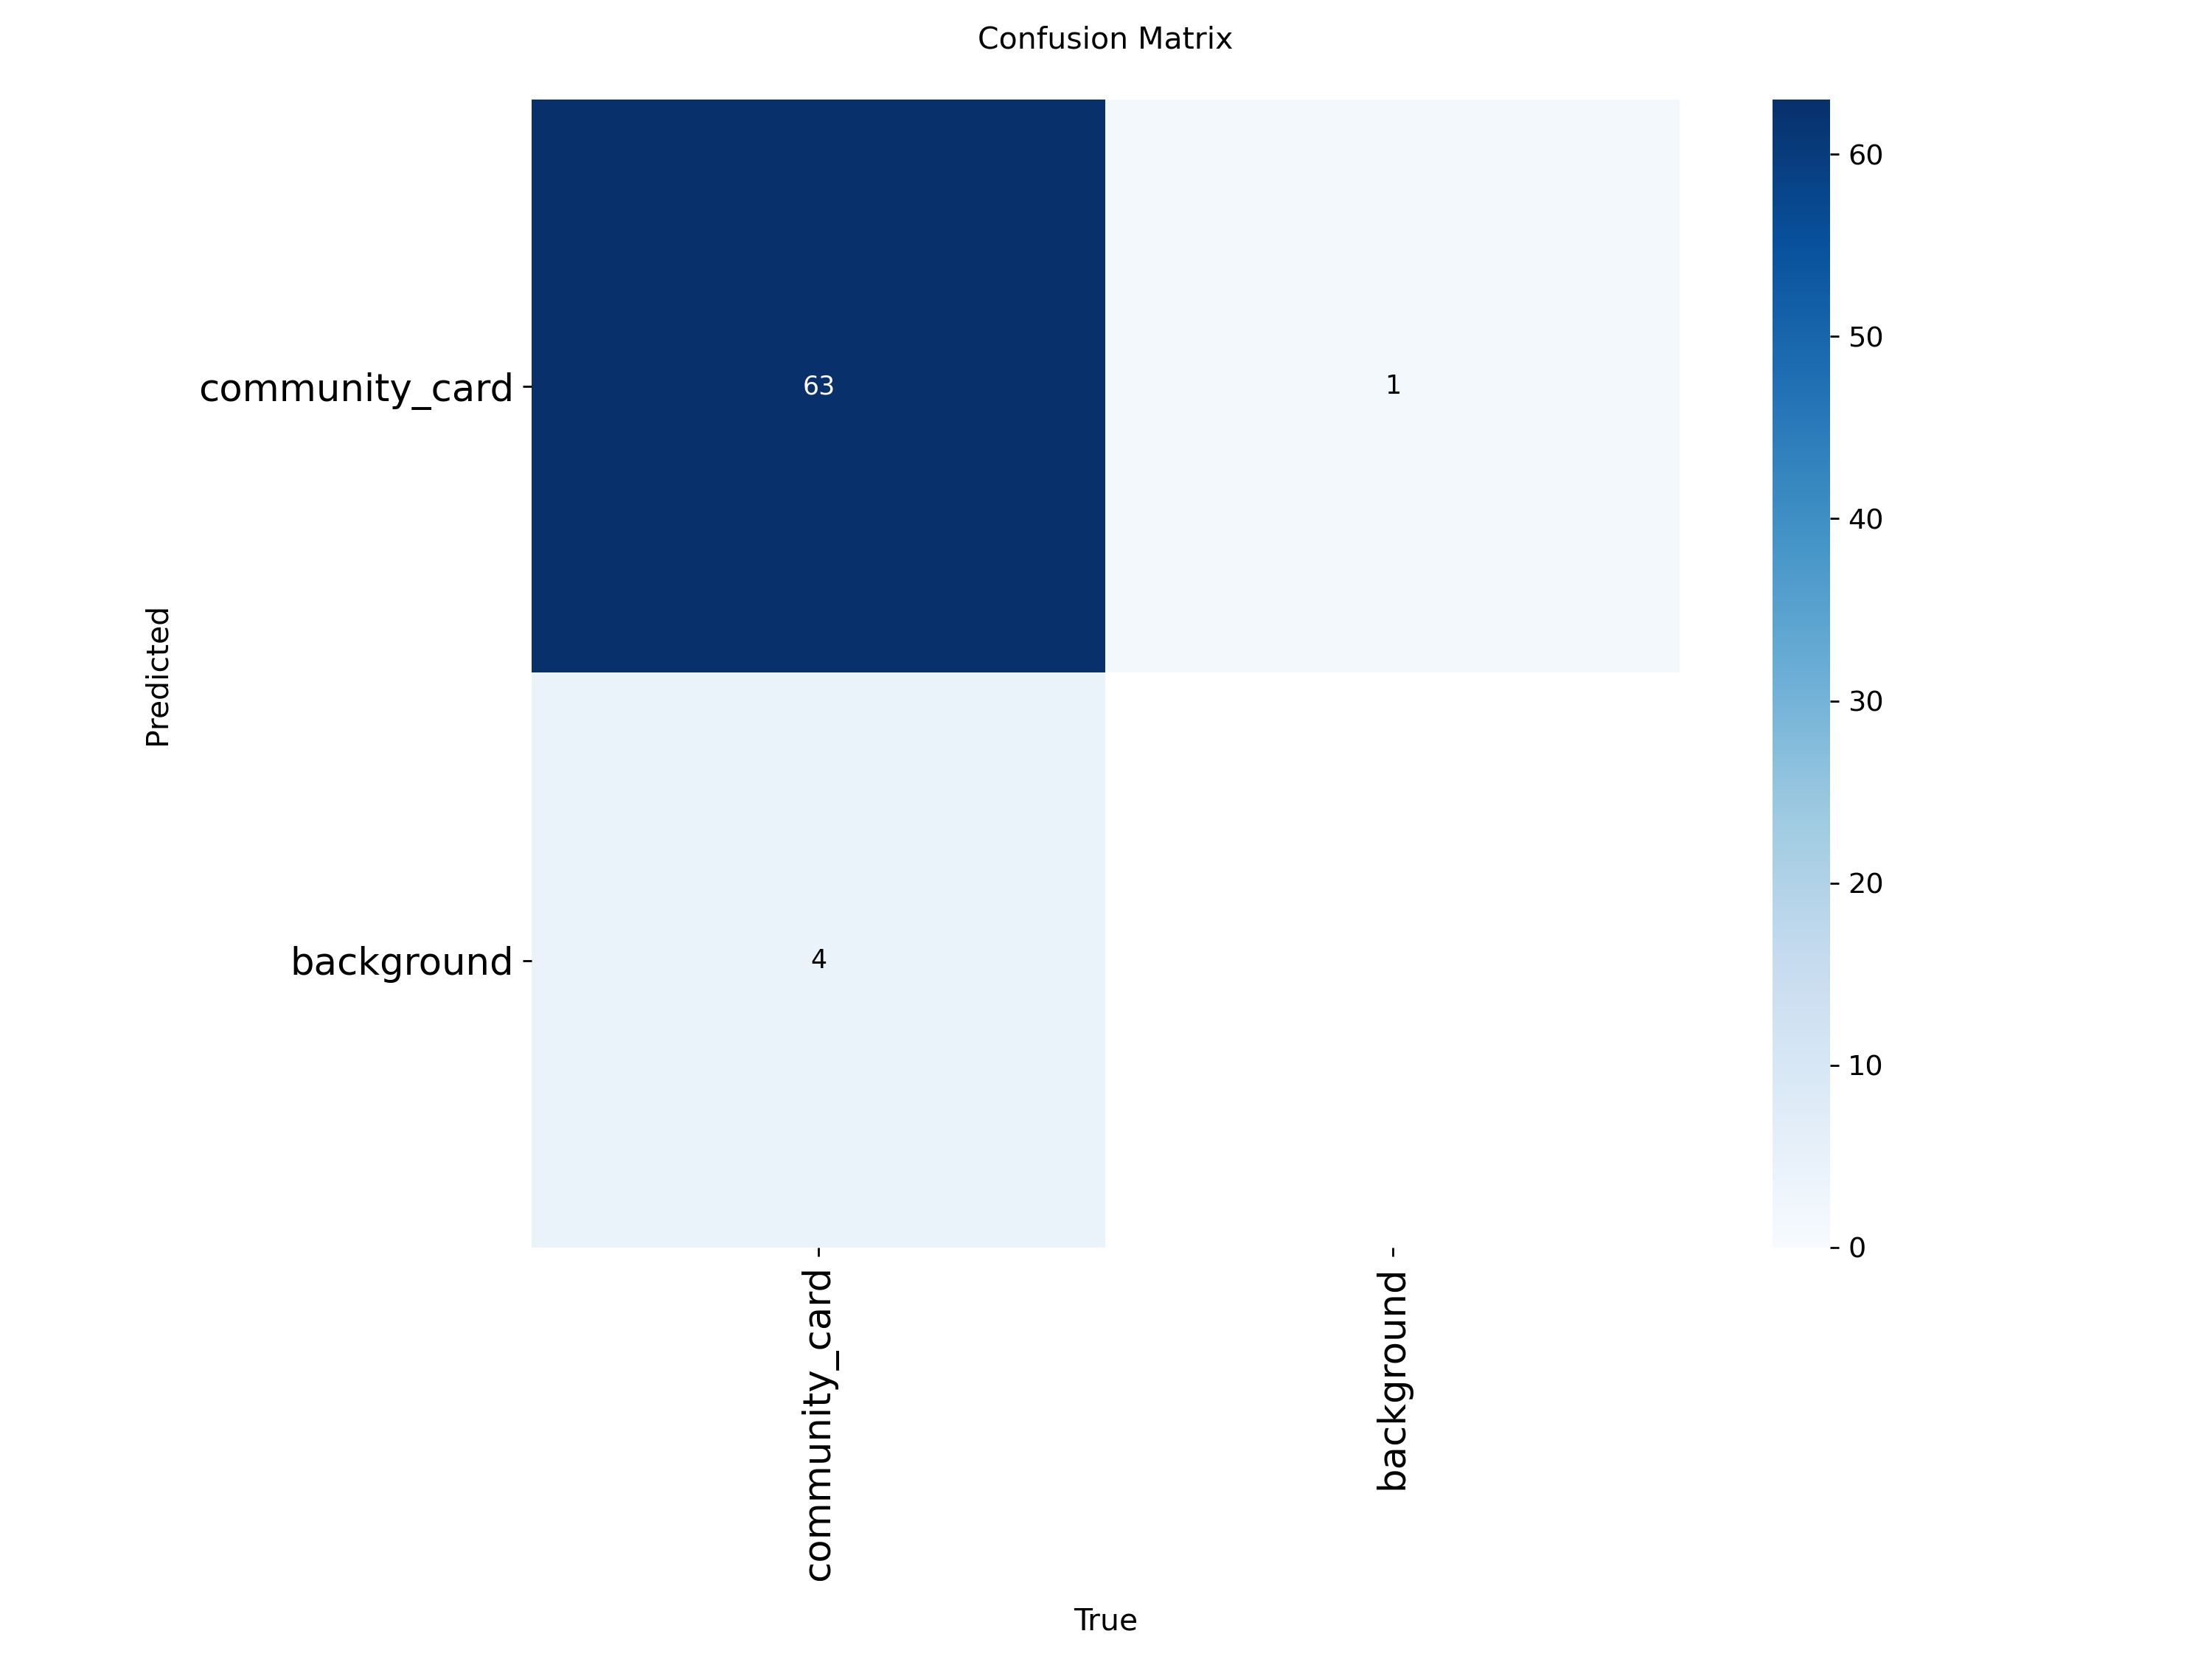

In [70]:
from ultralytics import YOLO
from IPython.display import Image, display
from pathlib import Path

# 1️⃣  Point to the weights you want to evaluate
model = YOLO("runs/detect/train/weights/best.pt")     # adjust path

# 2️⃣  Run validation on your labelled dataset
metrics = model.val(data="v3_dataset/data.yaml",         # path to data.yaml
                    imgsz=640,                        # same size you trained with
                    batch=16,                         # adjust for GPU memory
                    conf=0.001)                       # low threshold → all preds

# 3️⃣  Metrics are returned and also printed nicely
print("--- Main metrics ---")
print(f"(mAP50-95): {metrics.box.map:.4f}") # "accuracy"
print(f"mAP50   : {metrics.box.map50:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall   : {metrics.box.mr:.4f}")

# 4️⃣  Ultralytics saves PR-curves, confusion matrix, etc. in runs/detect/val
val_dir = Path(metrics.save_dir)          # e.g. runs/detect/val
display(Image(filename=str(val_dir / "confusion_matrix.png")))
